Logistic Regression

1. Data Exploration:

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

import streamlit as st

In [17]:
df_train =pd.read_csv("/content/Titanic_train.csv")
df_test = pd.read_csv("/content/Titanic_test.csv")


In [18]:
df_train.shape

(891, 12)

In [19]:
df_test.shape

(418, 11)

In [20]:
df_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
# defined a new coloumn called as code 1,2 to determin train and test data
df_train["code"] = 1
df_test["code"] = 2

In [22]:
# merging the two data fils in one place
data = pd.concat([df_train,df_test])

In [23]:
data.shape

(1309, 13)

In [24]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,code
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [25]:
# verifying the train samples as code 1 and code 2
data["code"].value_counts()

,count
code,
1,891
2,418


In [26]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'code'],
      dtype='object')

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  code         1309 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 143.2+ KB


In [28]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,code
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479,1.319328
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668,0.466394
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,1.000000
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,2.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,2.000000


In [29]:
data['Age'].isna().sum()/len(data['Age'])*100

20.091673032849503

In [33]:
#Data cleaning

data['Age'].fillna(data['Age'].median(),inplace=True)

<ipython-input-33-778811c38ca8>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(),inplace=True)


In [34]:
data['Fare'].fillna(data['Fare'].median(),inplace=True)

<ipython-input-34-ae37ac05ba0b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Fare'].fillna(data['Fare'].median(),inplace=True)


In [35]:
data['Cabin'].isna().sum()/len(data['Cabin'])*100

77.46371275783041

In [46]:
# Visualizations
numerical_features = data.select_dtypes(include=np.number)
categorical_features = data.select_dtypes(exclude=np.number)


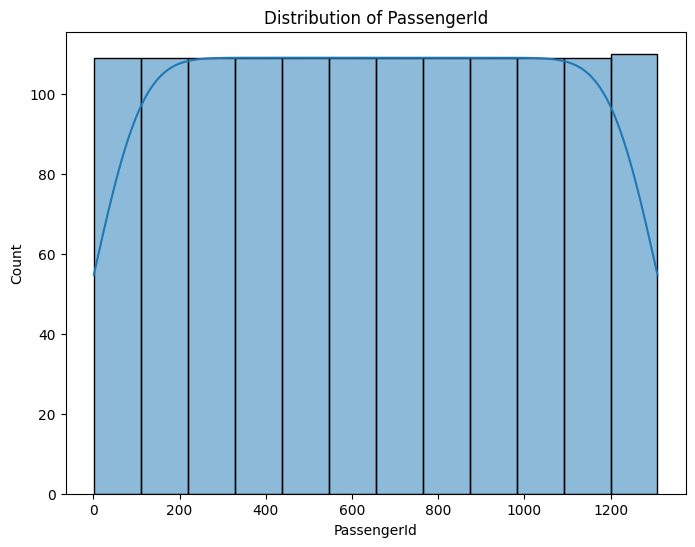

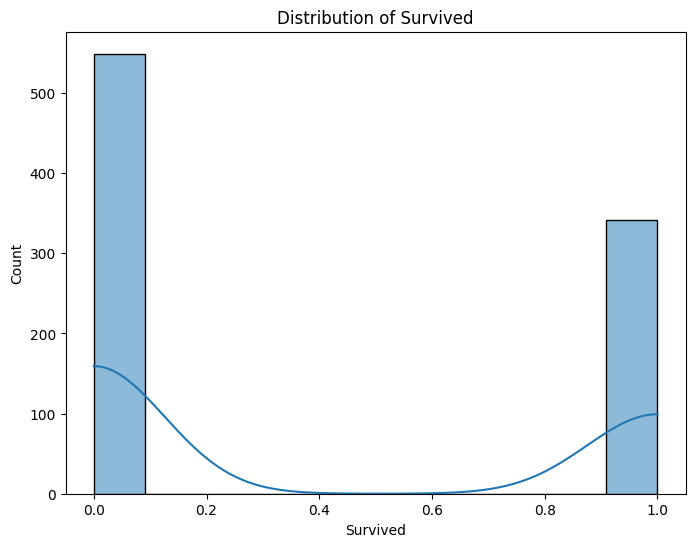

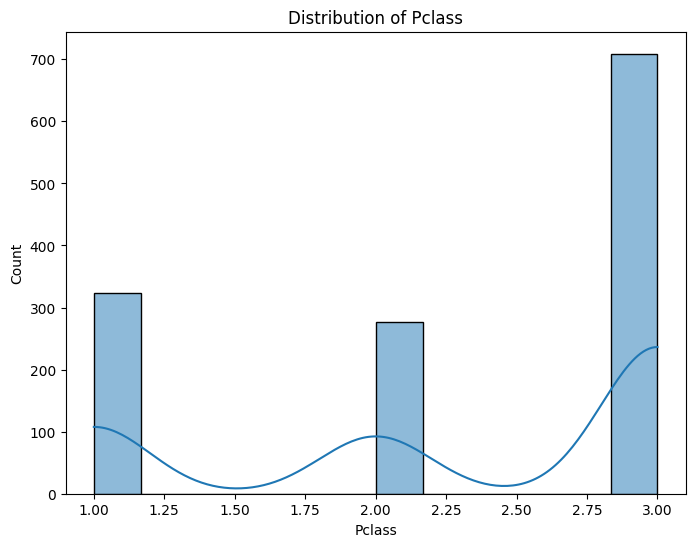

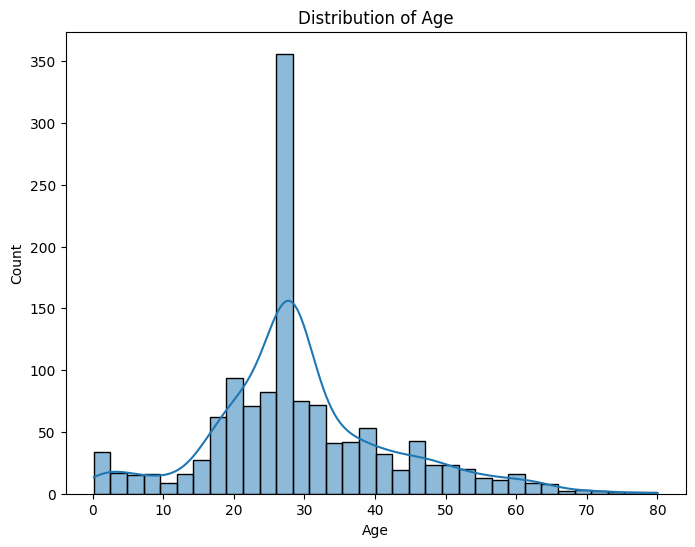

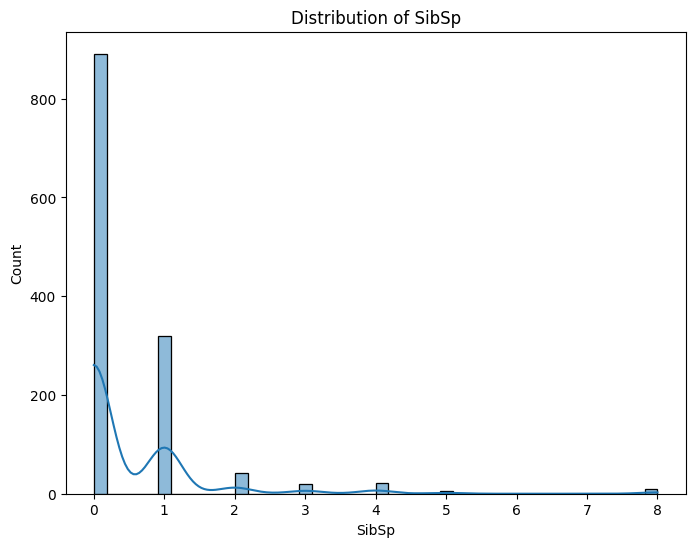

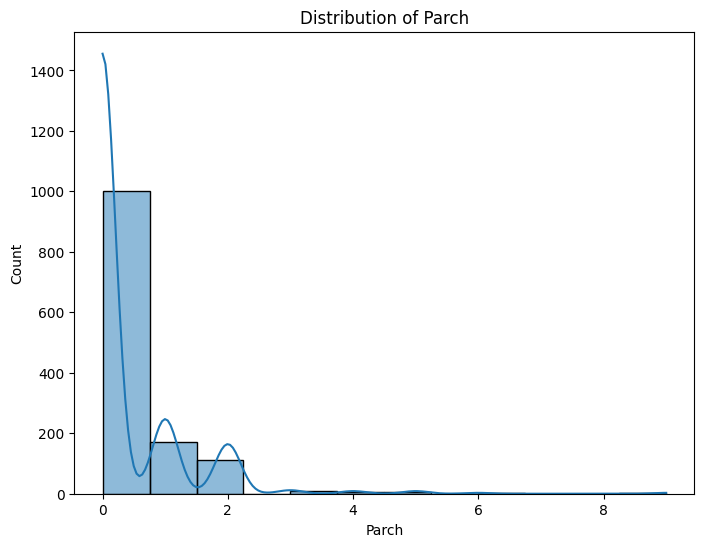

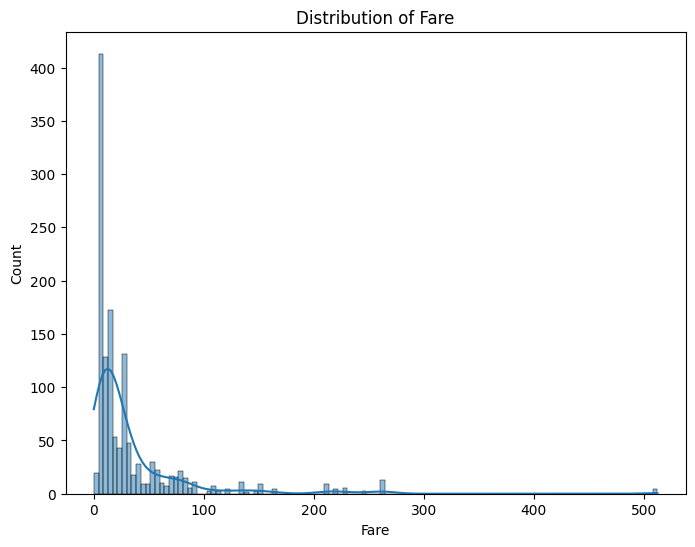

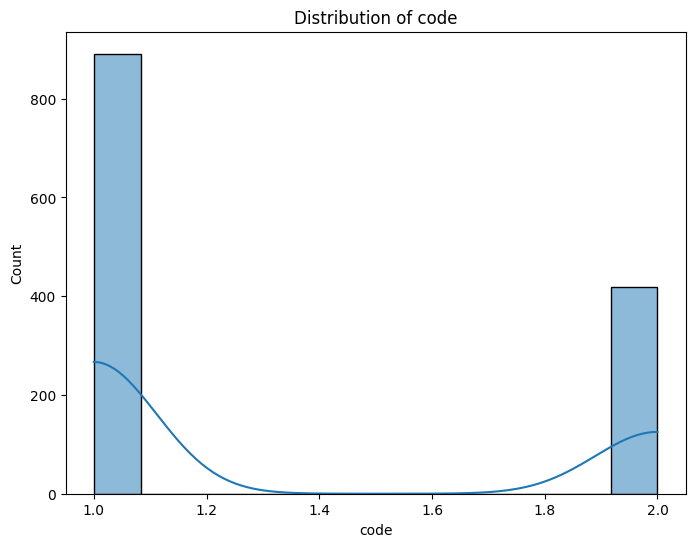

In [47]:
# Histograms for numerical features
for col in numerical_features.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


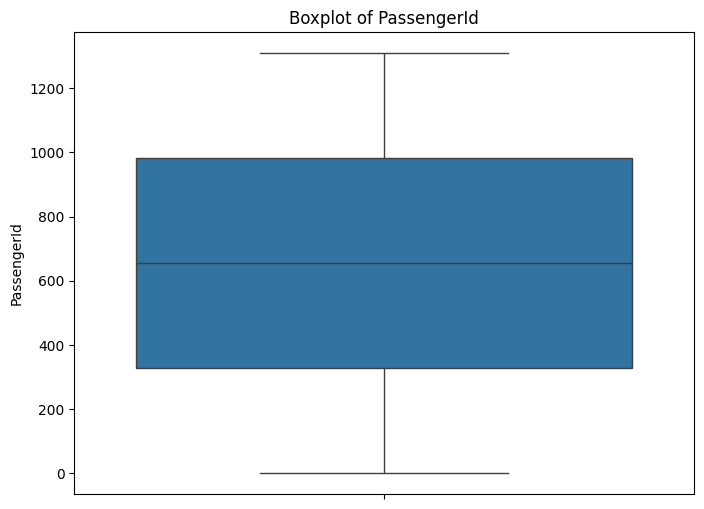

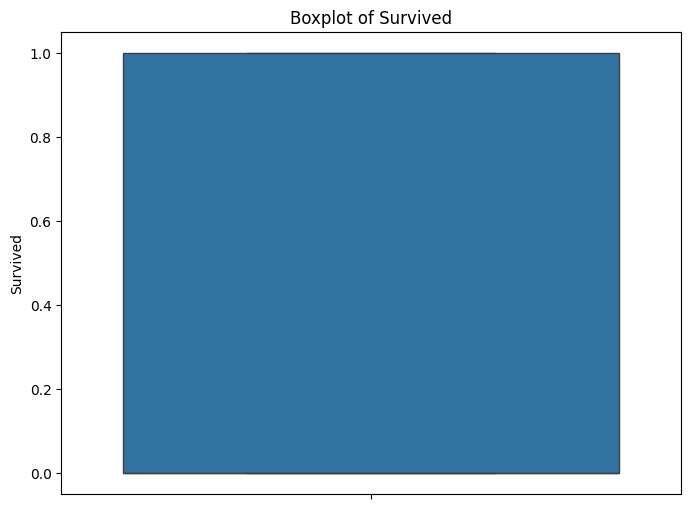

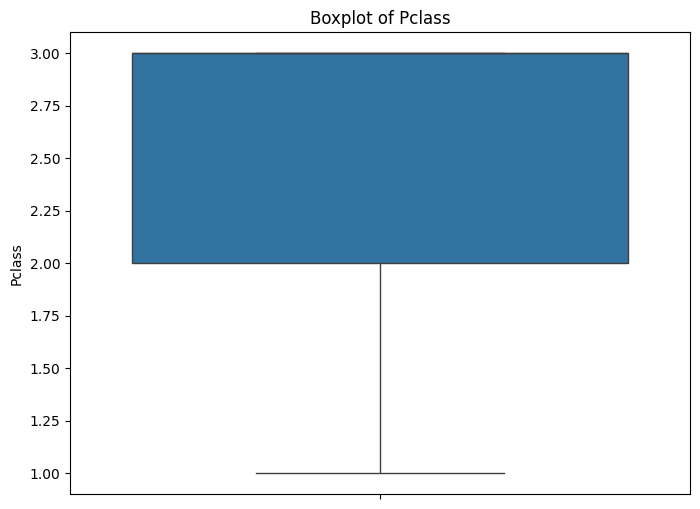

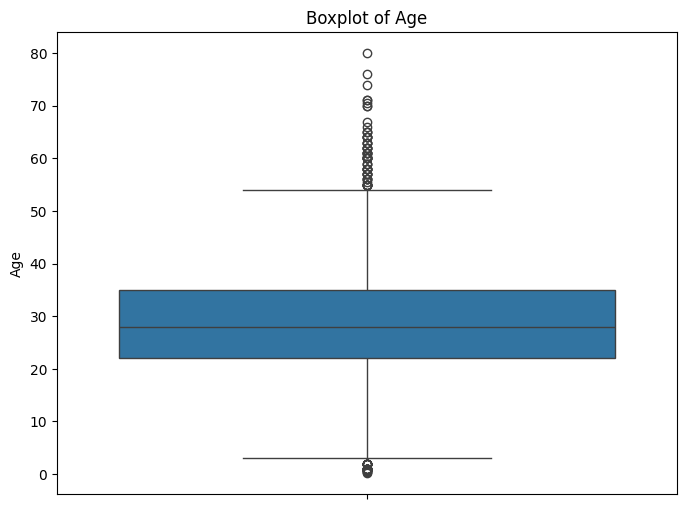

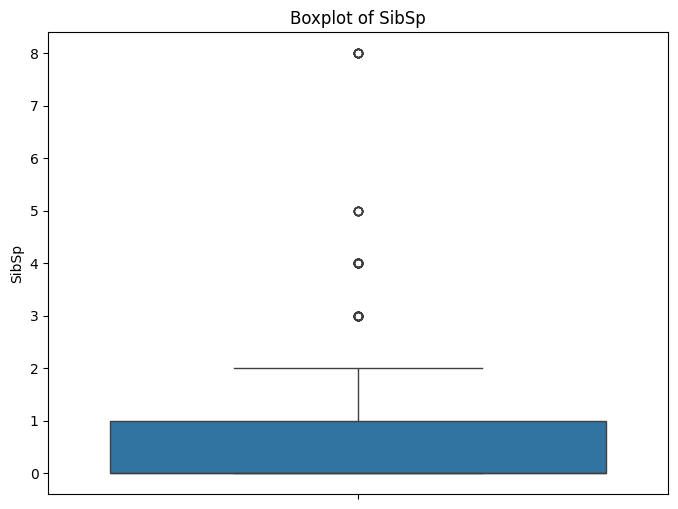

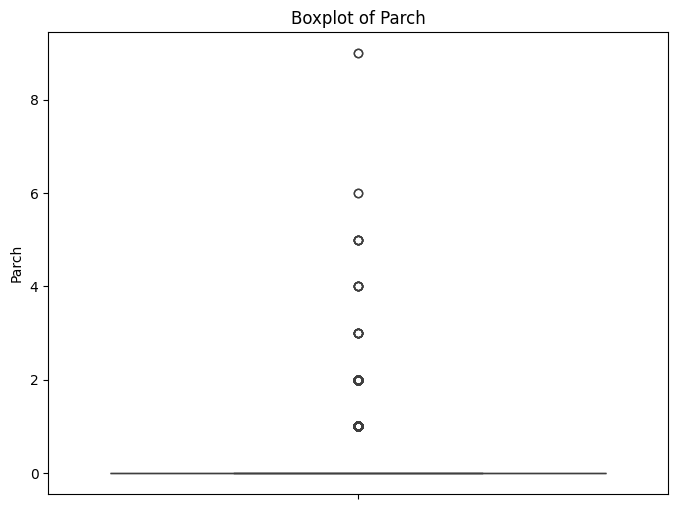

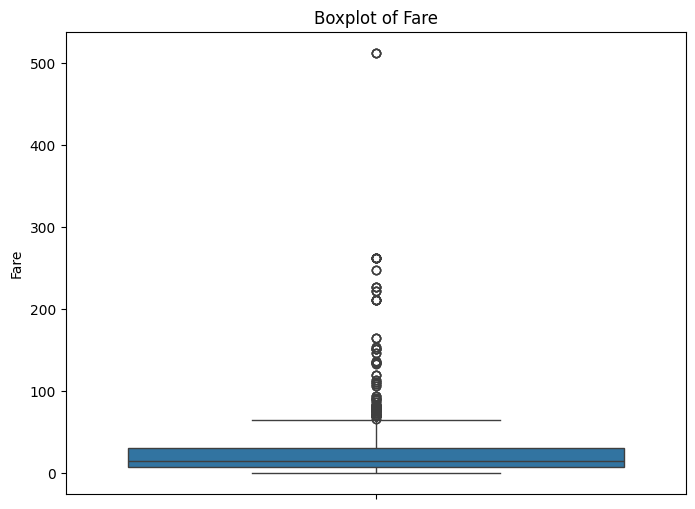

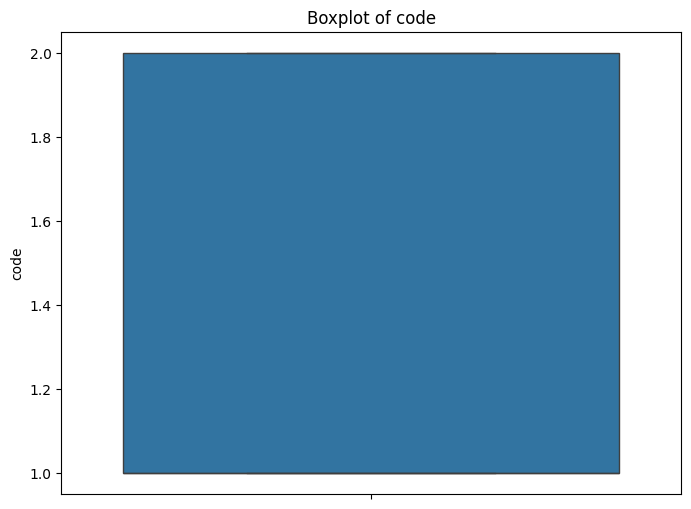

In [48]:
# Box plots for numerical features
for col in numerical_features.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=data[col])  # Use 'y=' for vertical boxplot
    plt.title(f'Boxplot of {col}')
    plt.show()



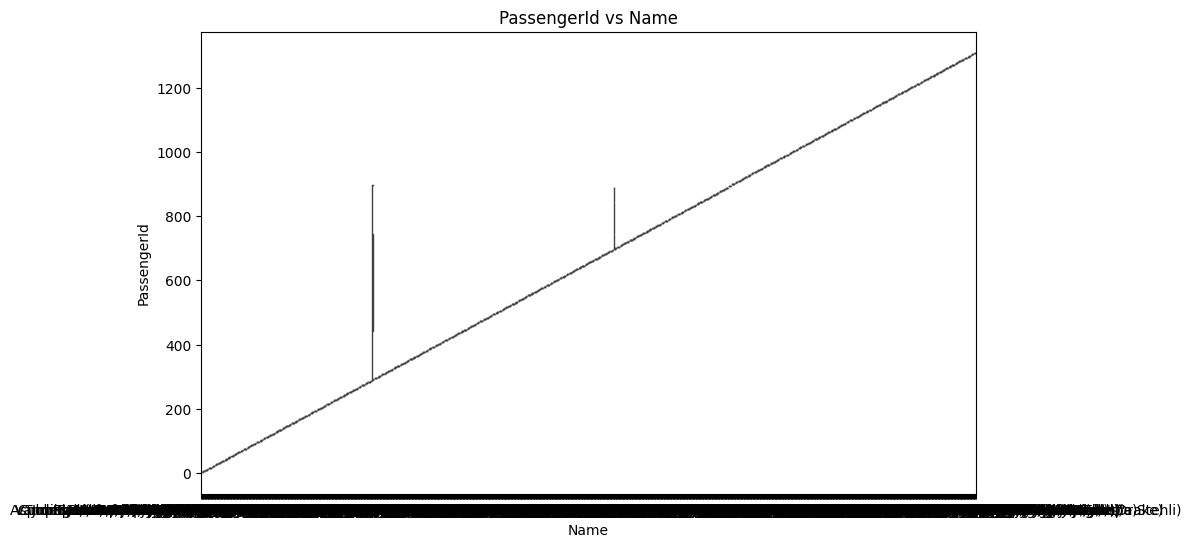

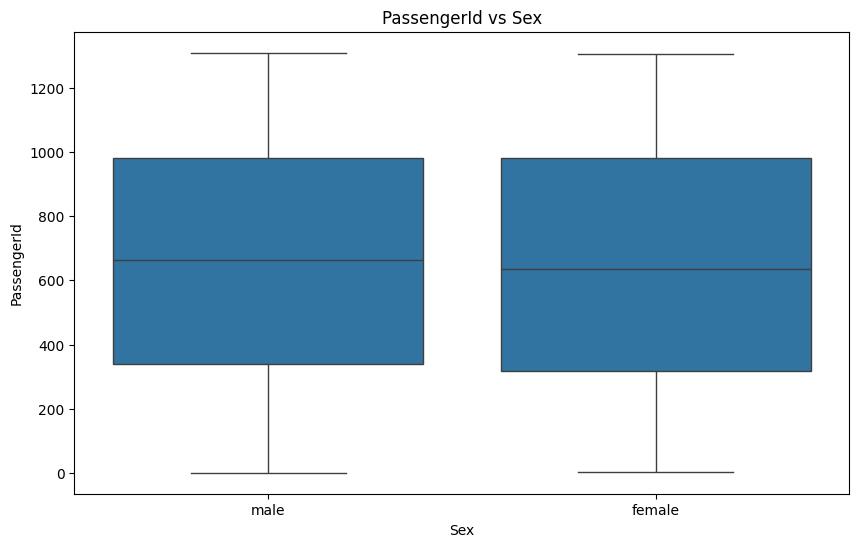

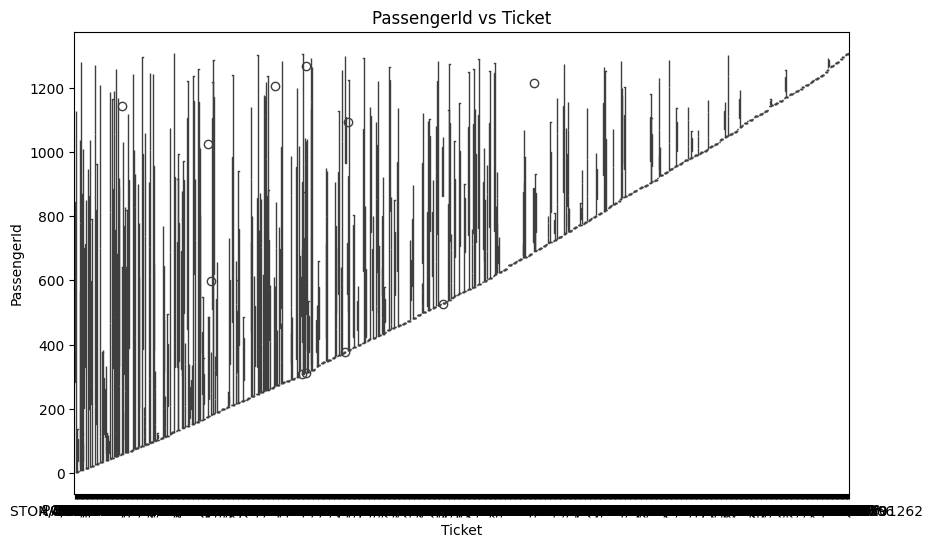

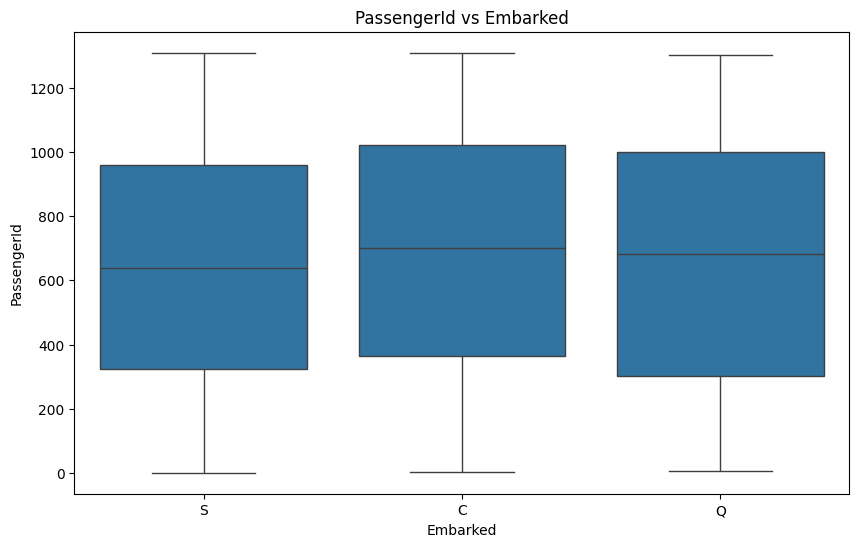

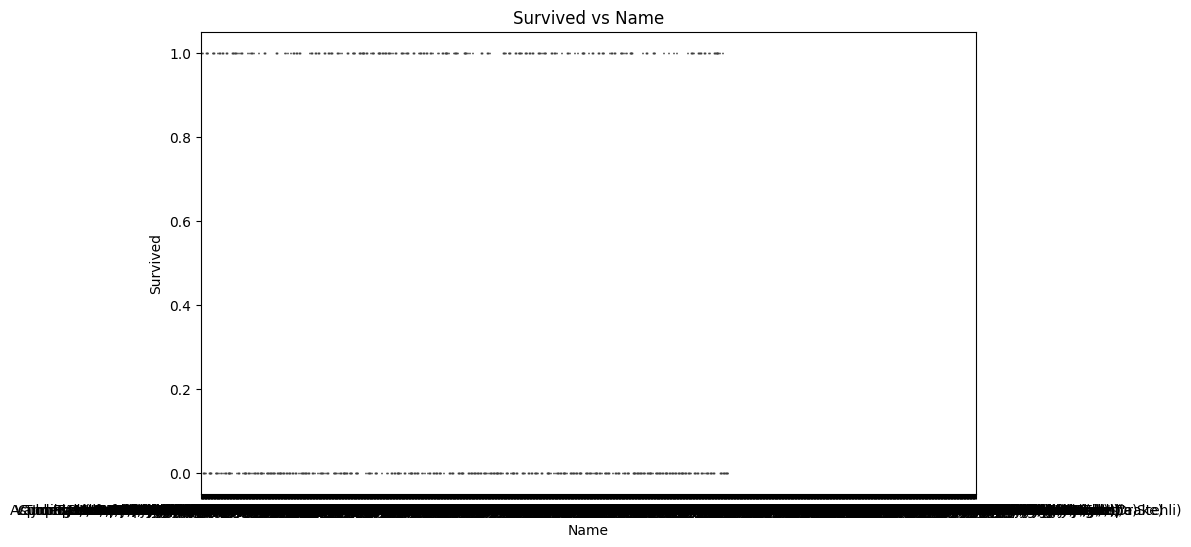

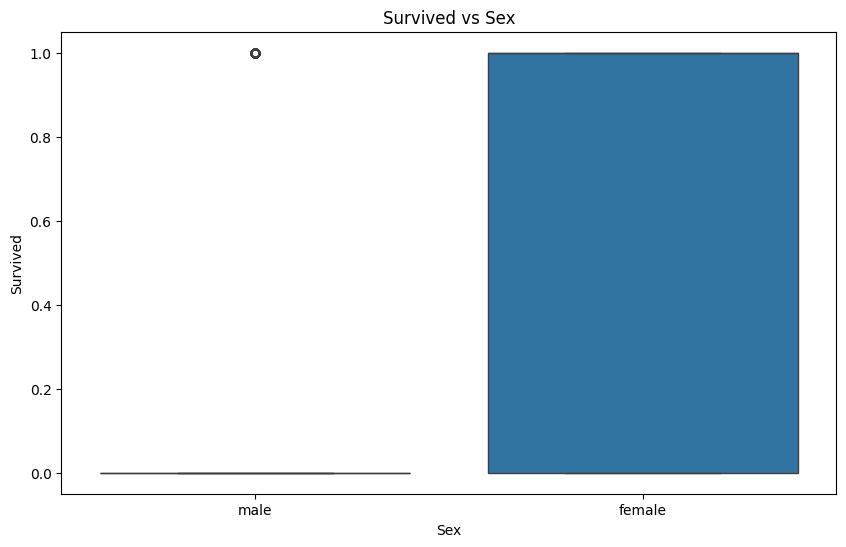

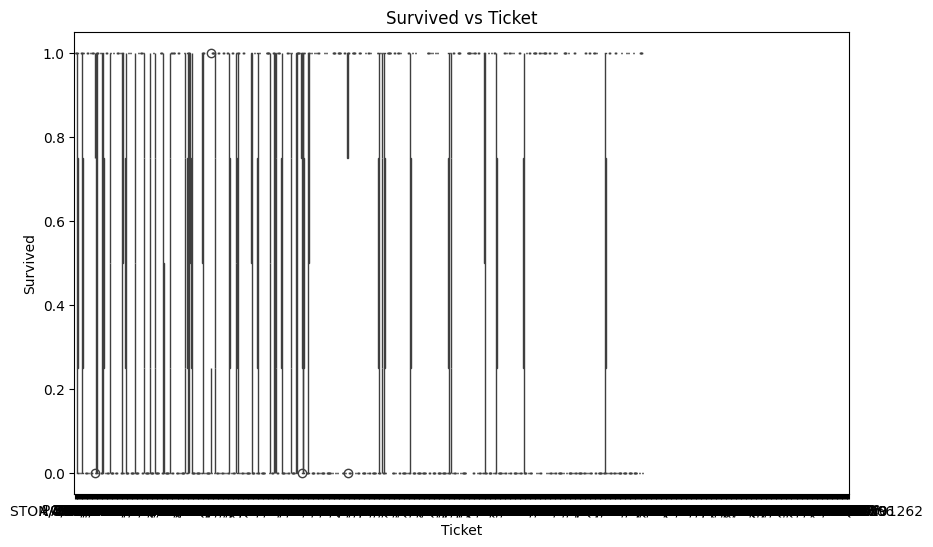

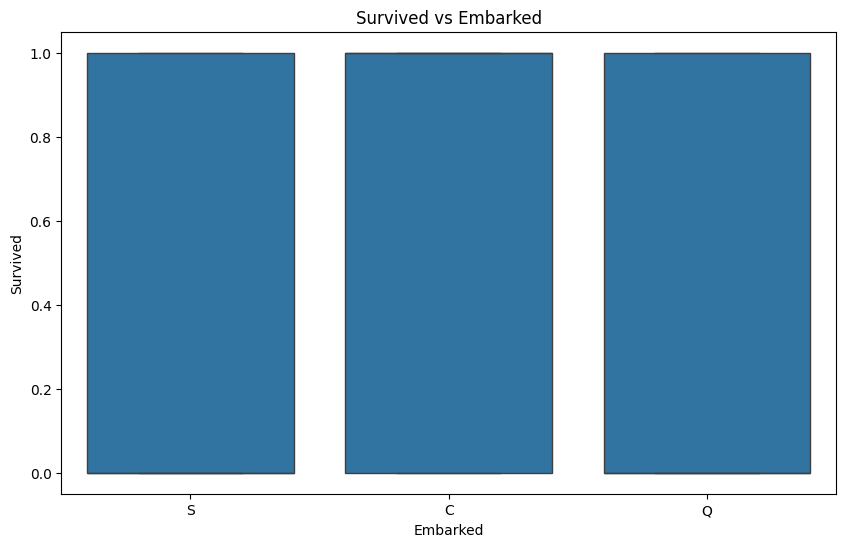

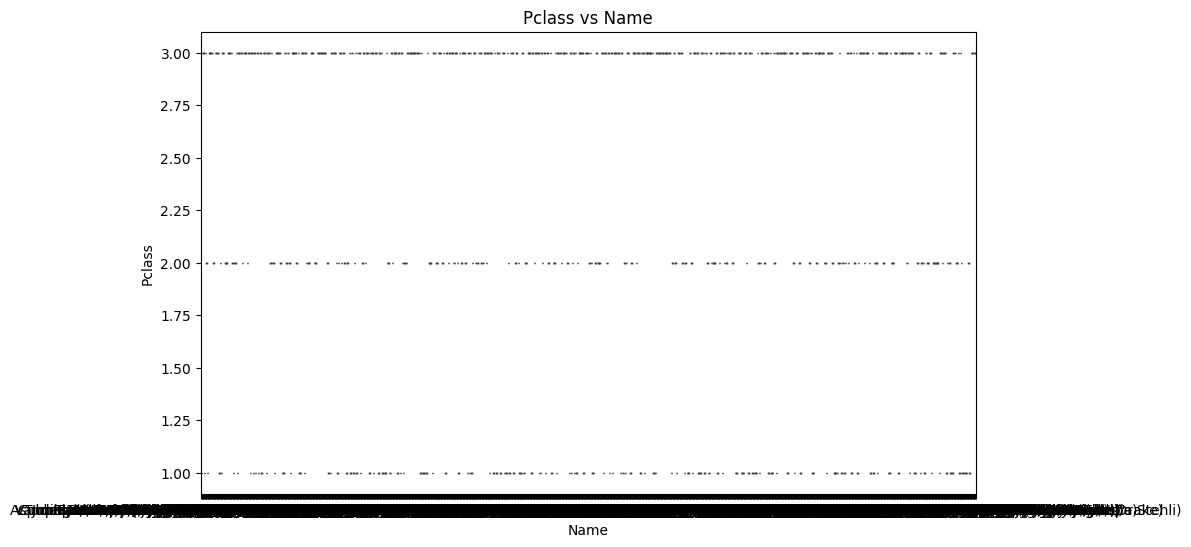

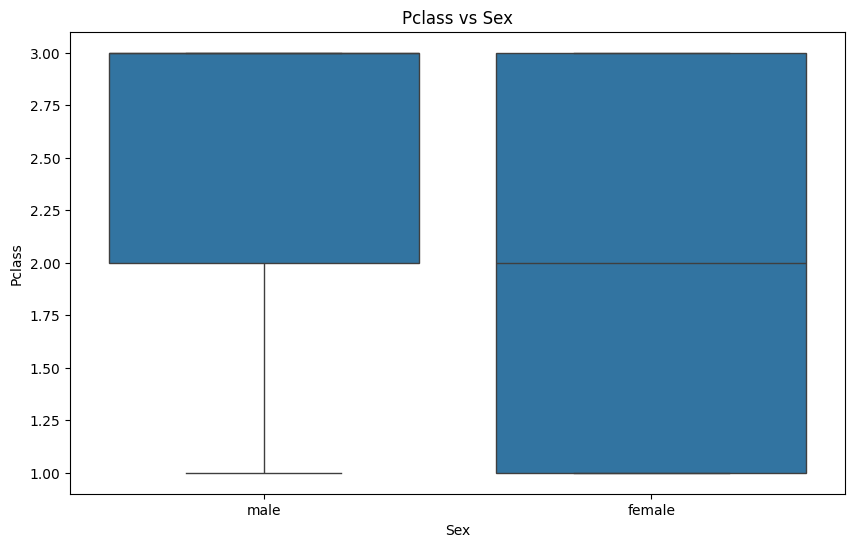

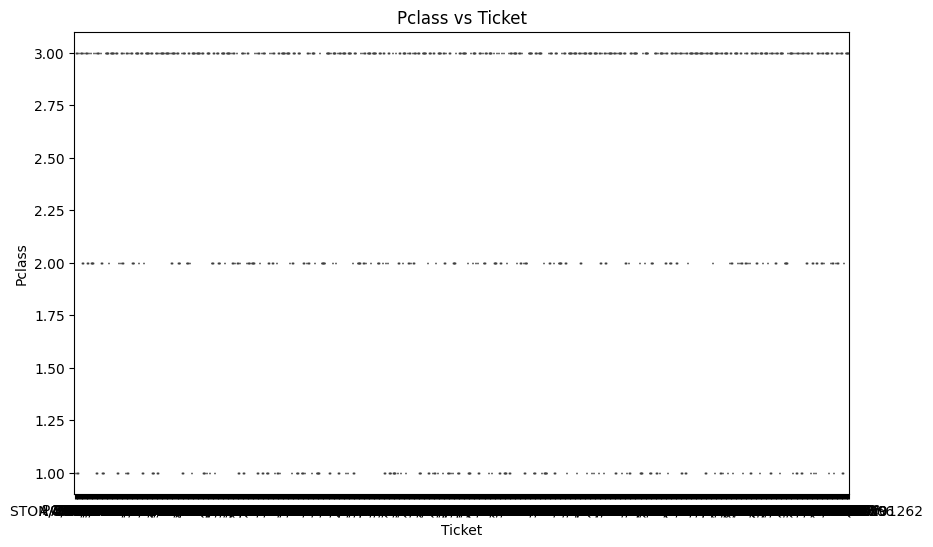

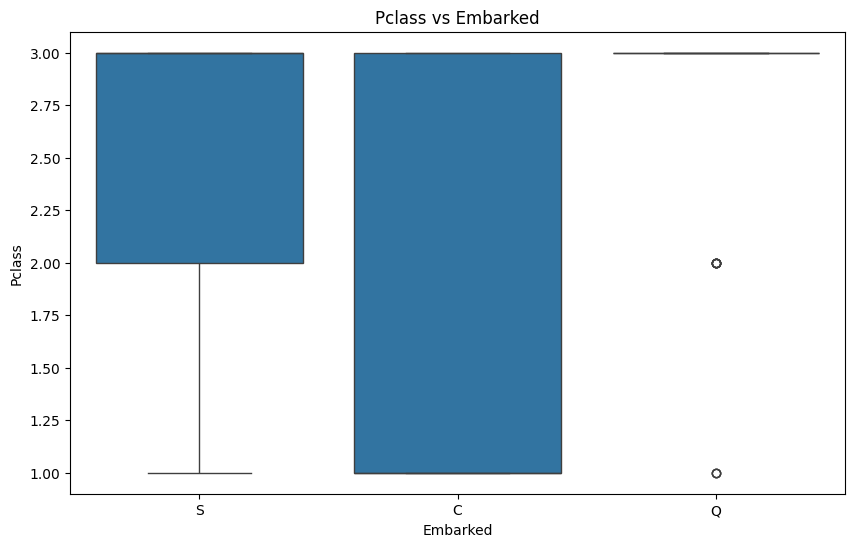

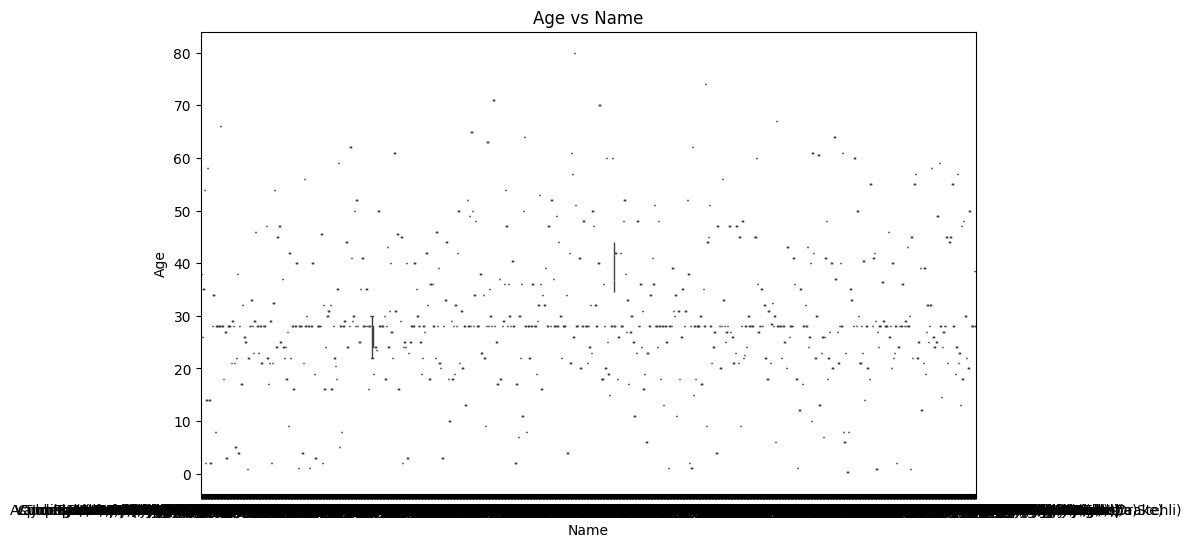

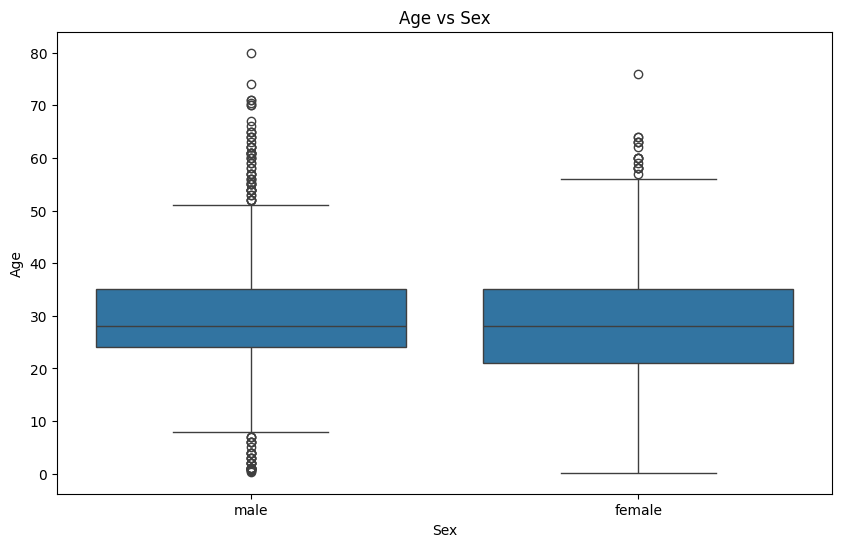

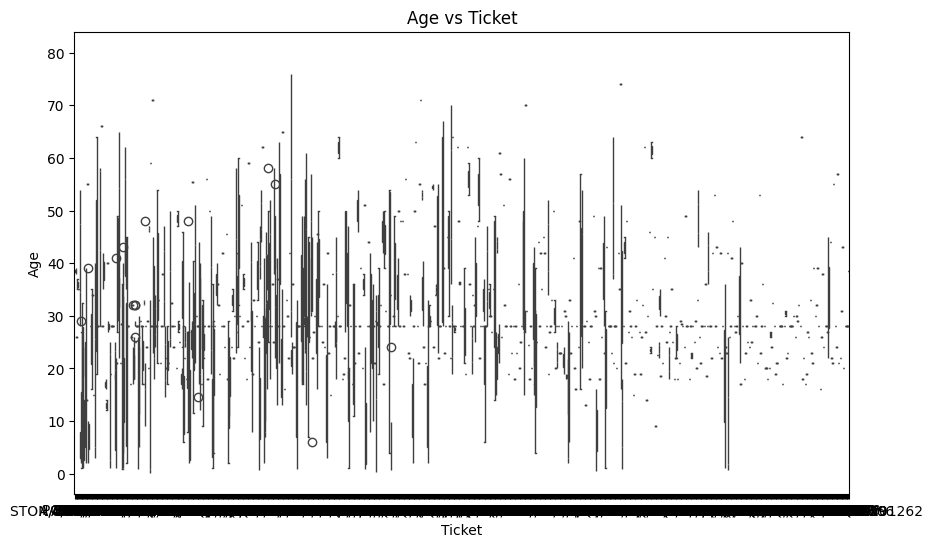

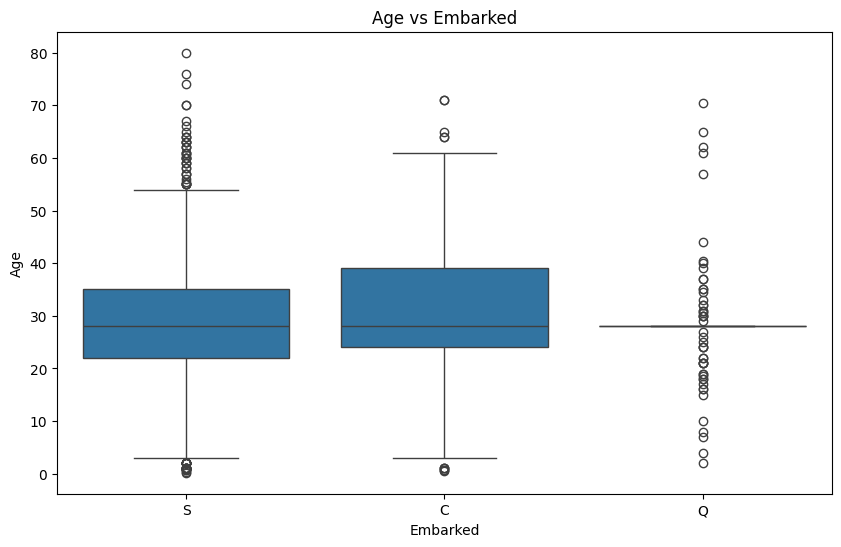

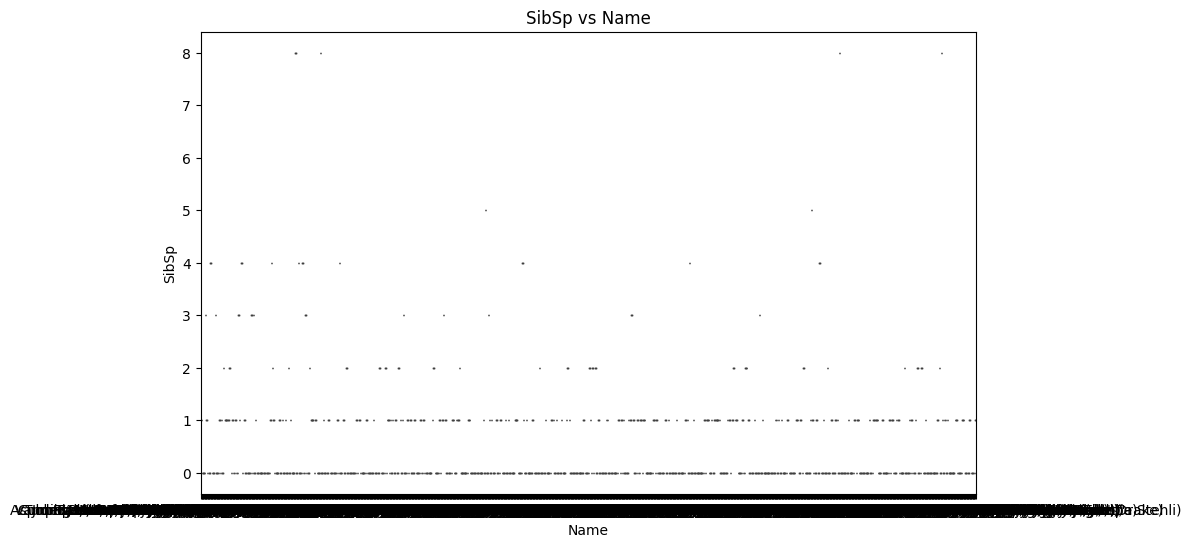

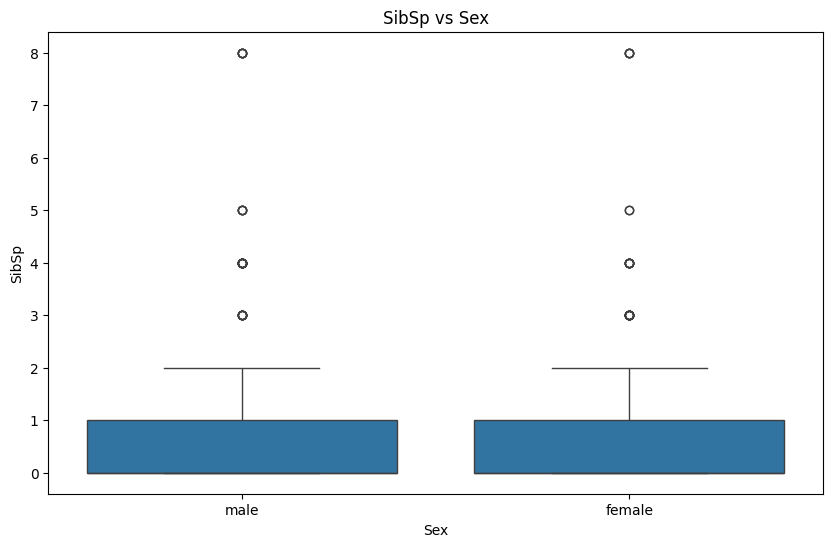

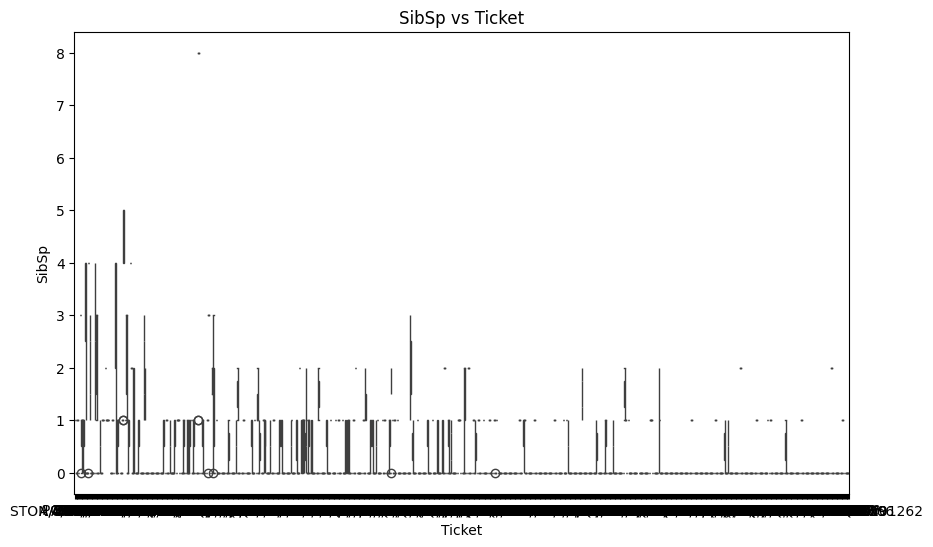

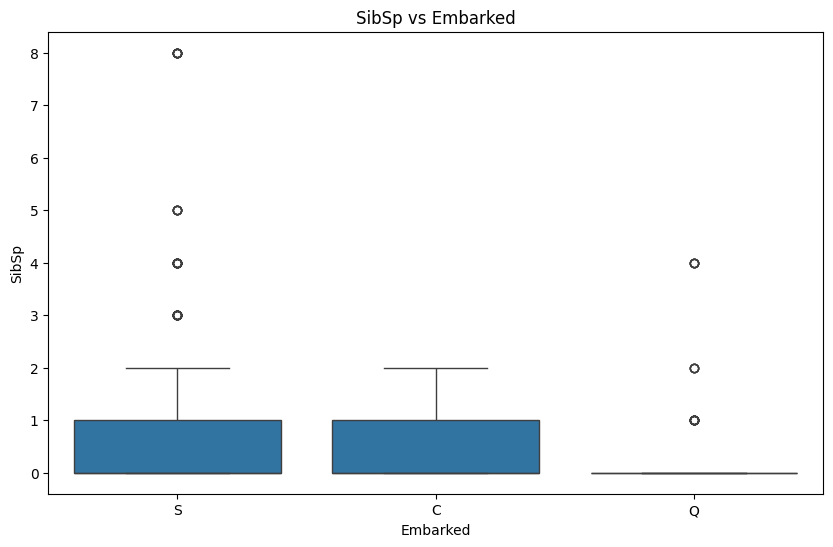

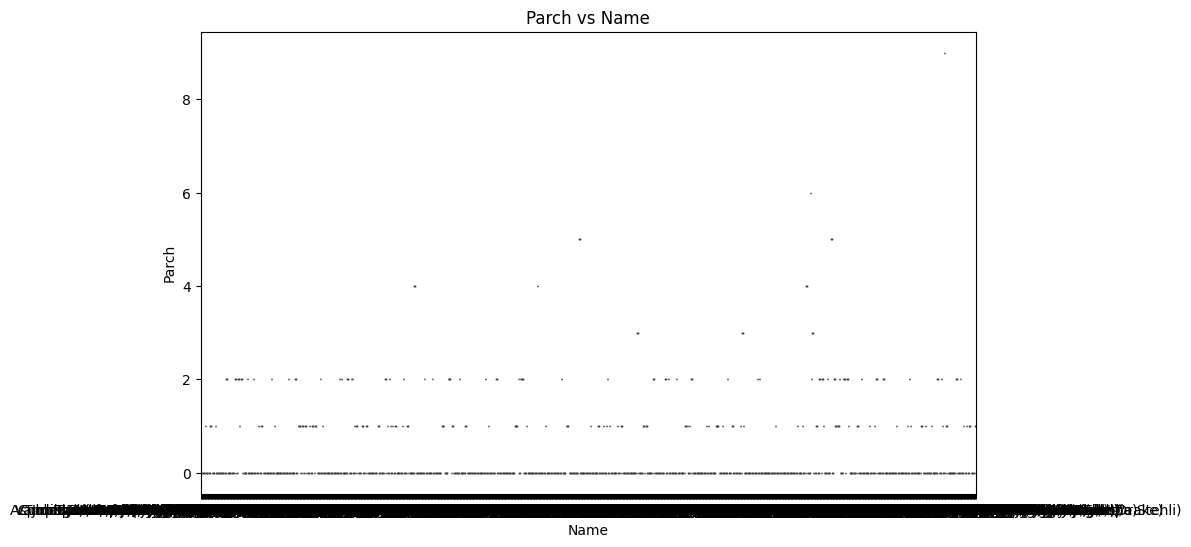

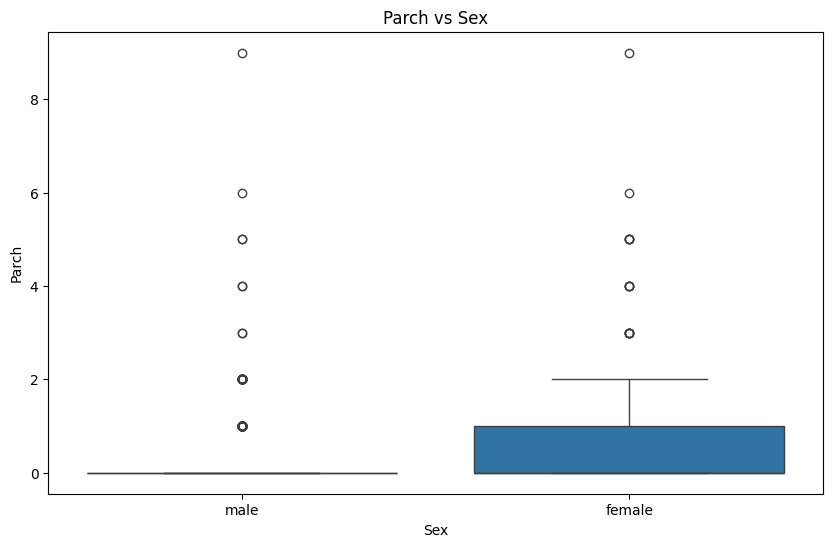

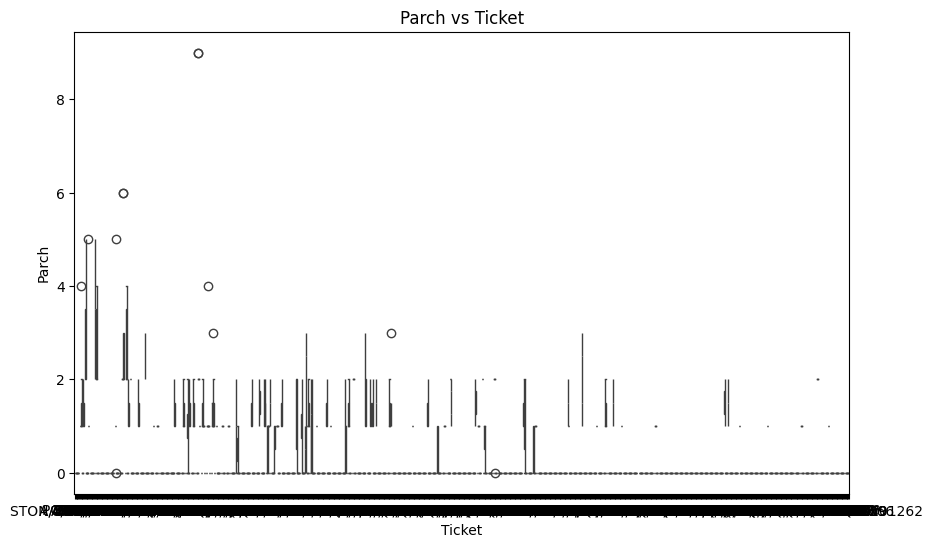

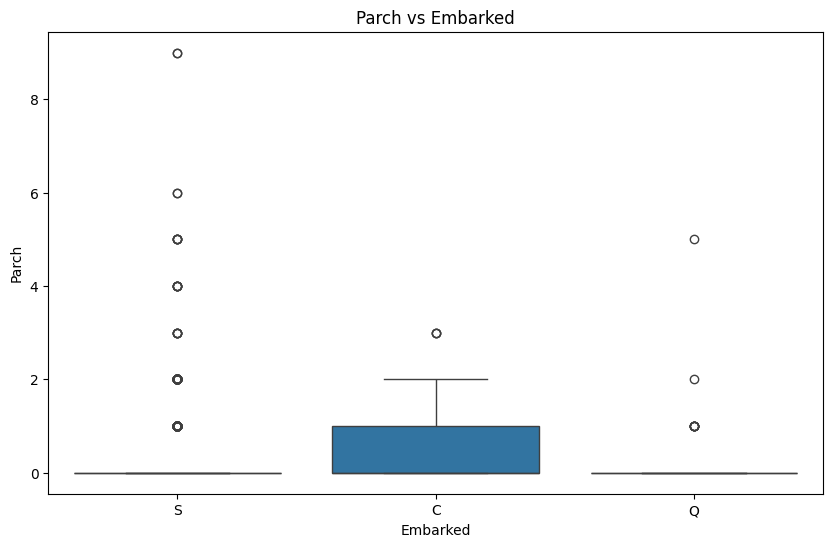

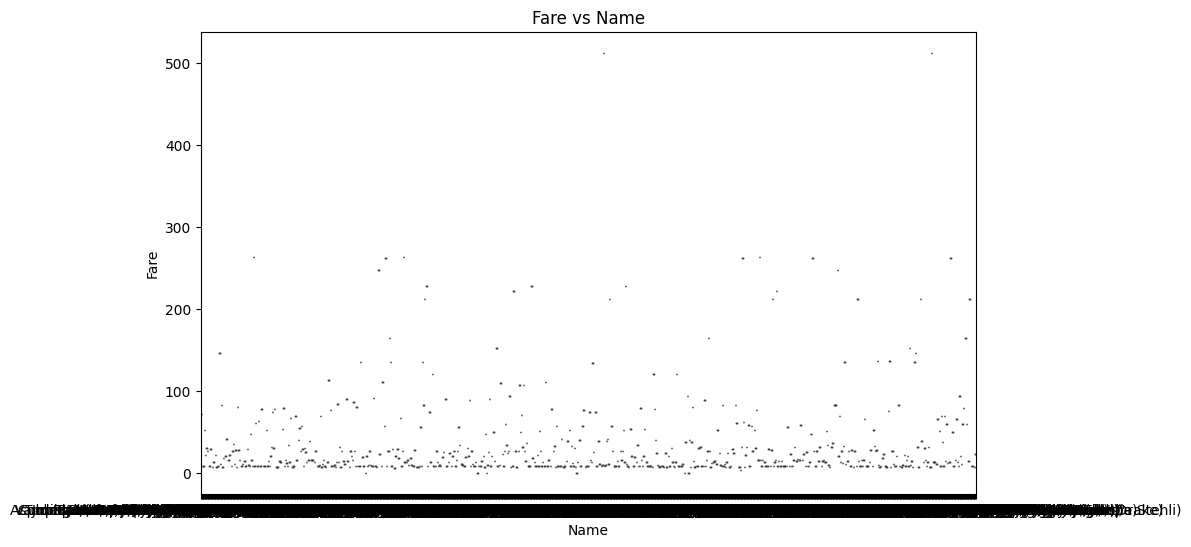

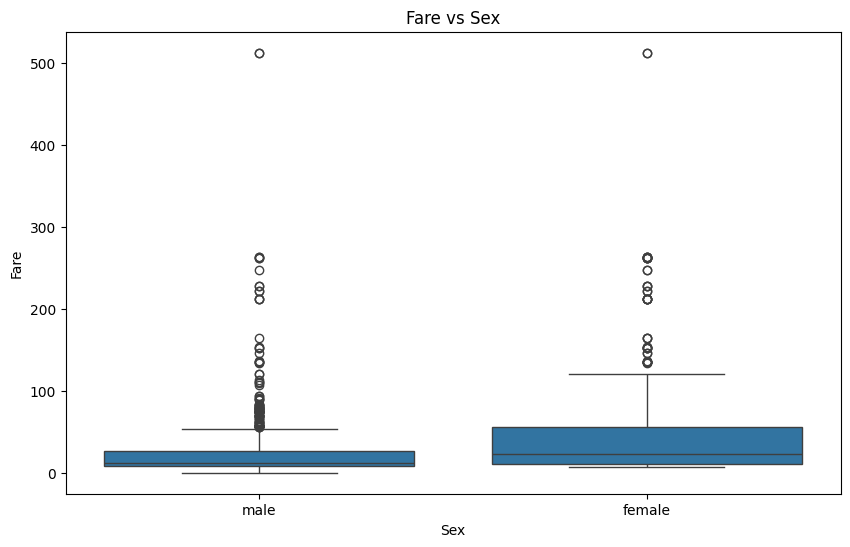

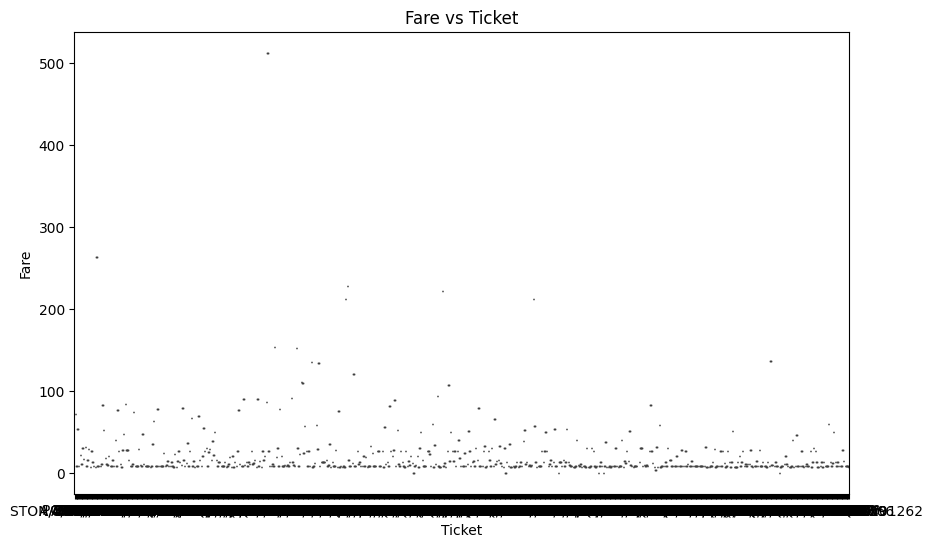

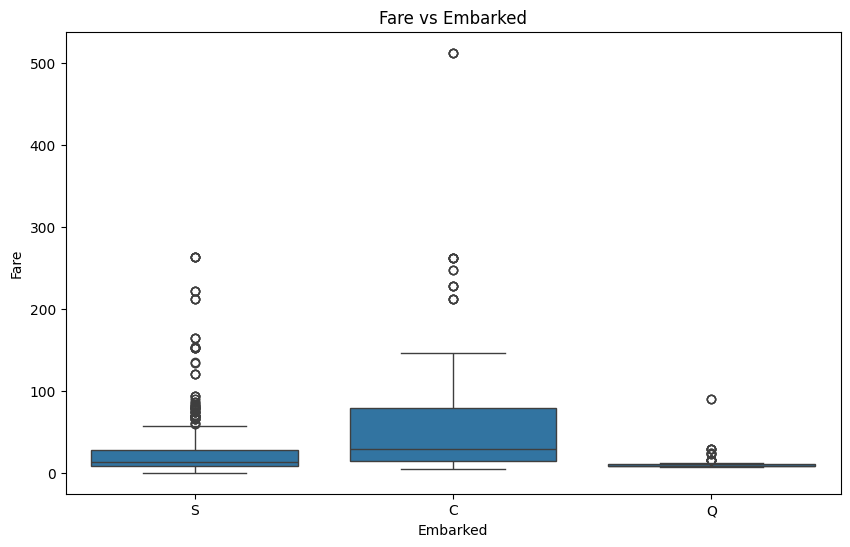

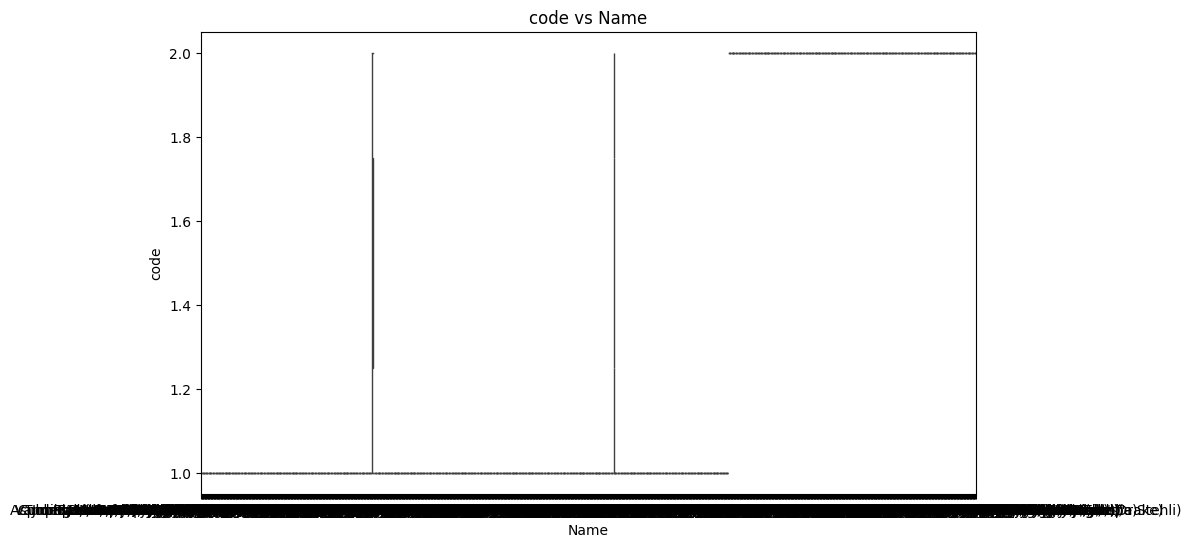

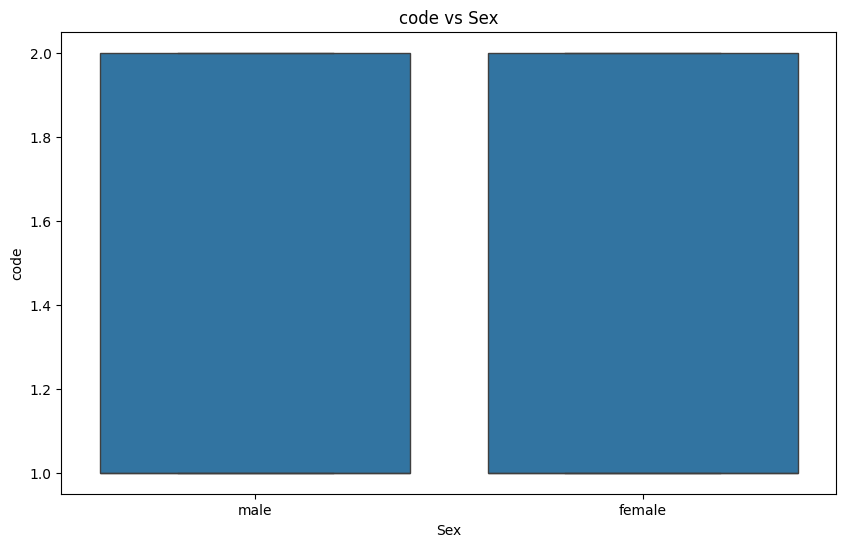

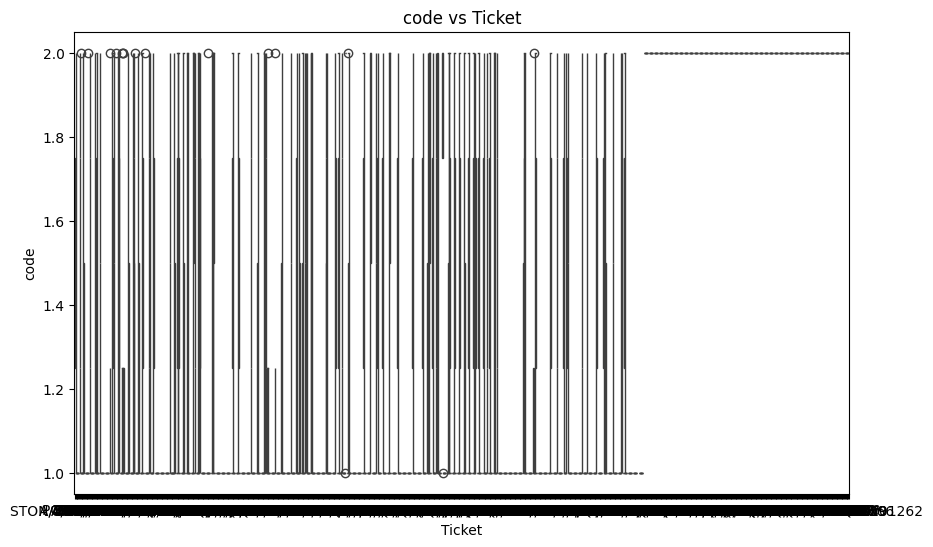

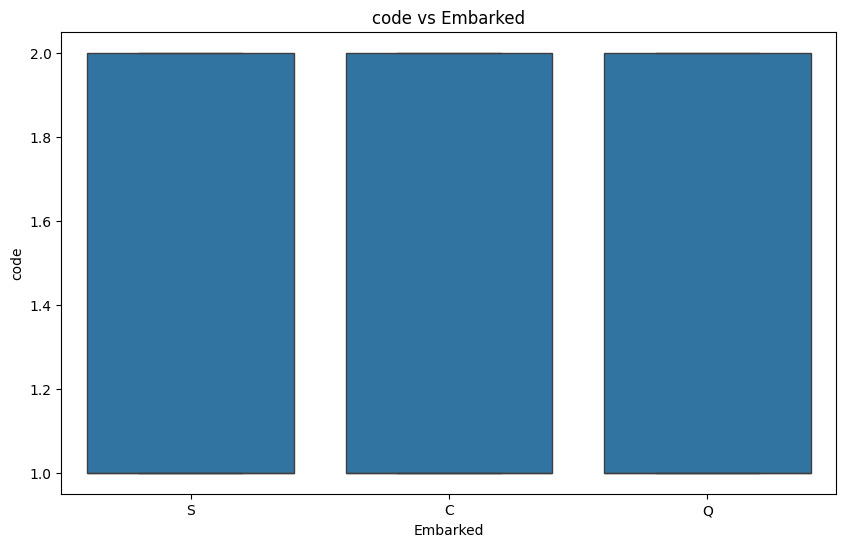

In [50]:
# Relationships between numerical and categorical features
for num_col in numerical_features.columns:
  for cat_col in categorical_features.columns:
    plt.figure(figsize=(10, 6))
    # Reset index before plotting to avoid duplicate index issues
    sns.boxplot(x=cat_col, y=num_col, data=data.reset_index())
    plt.title(f'{num_col} vs {cat_col}')
    plt.show()

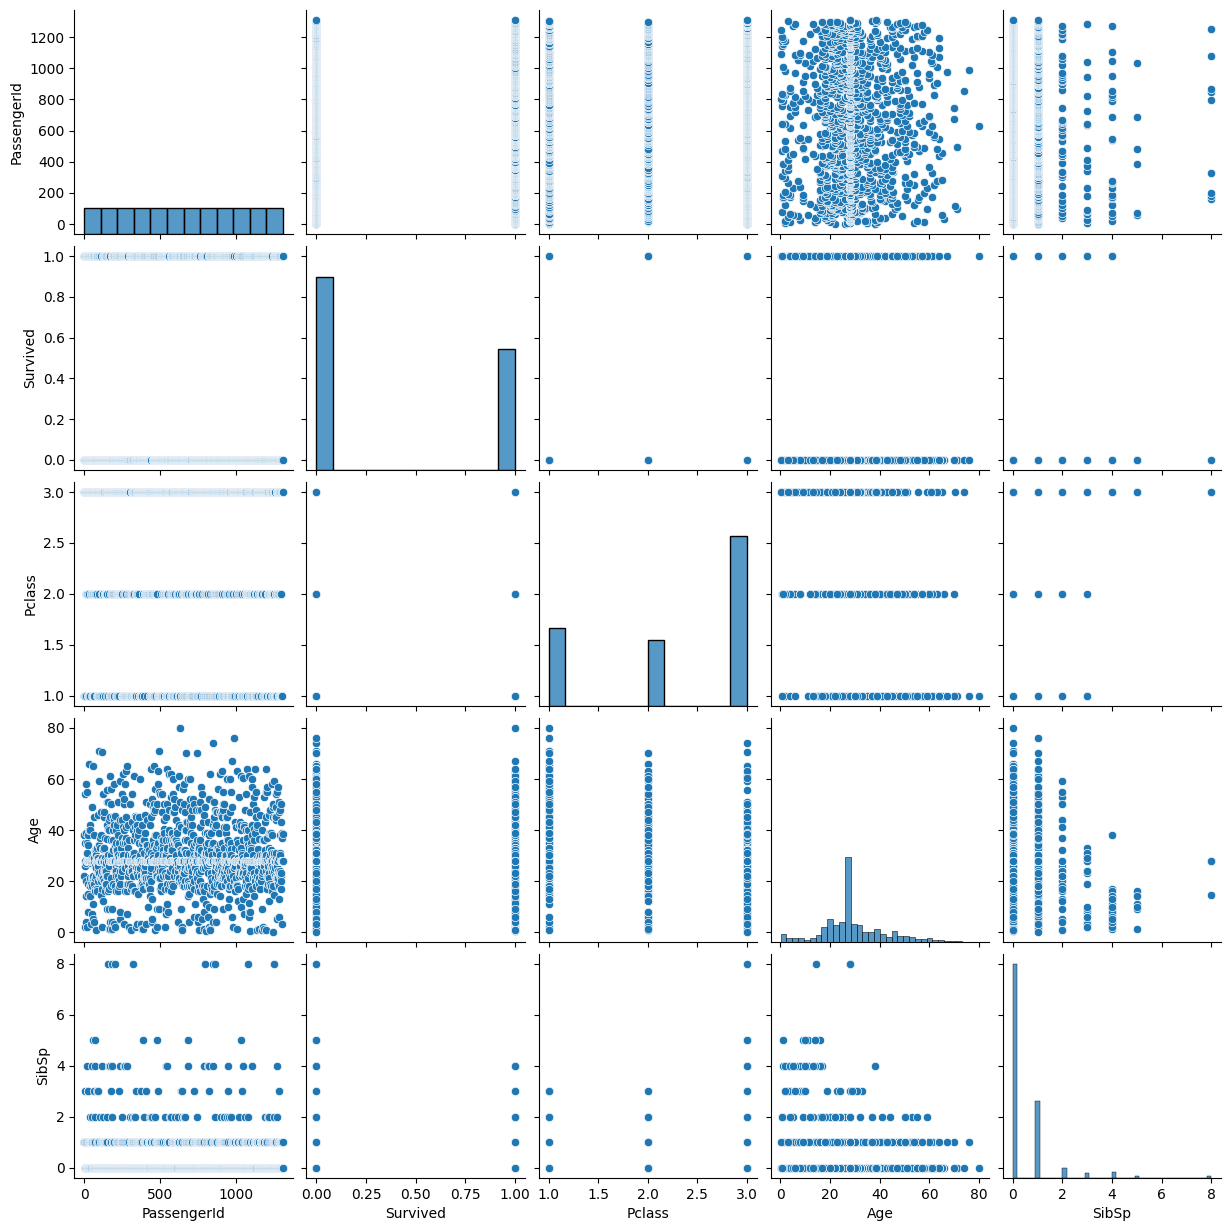

In [52]:
# Pair plots for relationships between numerical features (limit to a subset for readability)
sns.pairplot(data[numerical_features.columns[:5]])  # Adjust the number of columns
plt.show()


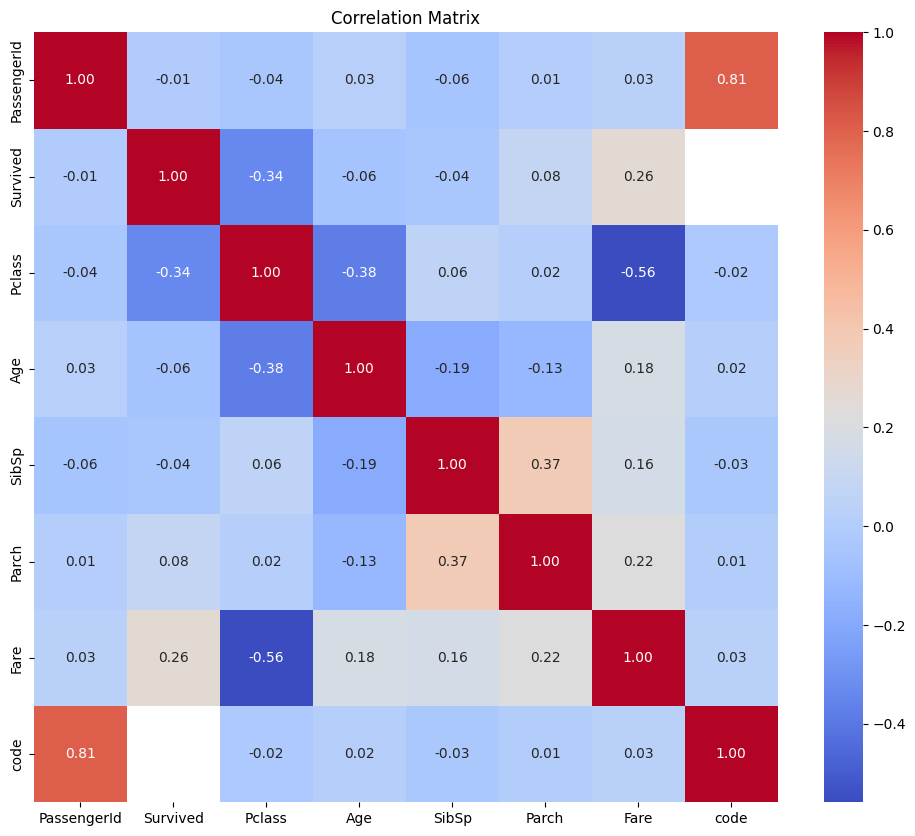

In [53]:
# Correlation matrix (heatmap) for numerical features
correlation_matrix = numerical_features.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [54]:
# Identify highly correlated features
high_corr_features = correlation_matrix[(correlation_matrix > 0.7) | (correlation_matrix < -0.7)]
print("Features with high correlation:")
high_corr_features



Features with high correlation:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,code
PassengerId,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,0.80751
Survived,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Pclass,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Age,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
SibSp,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Parch,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Fare,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
code,0.80751,NaN,NaN,NaN,NaN,NaN,NaN,1.00000


2. Data Preprocessing:

In [59]:
# Data Cleaning (example: handling missing values)
# Fill missing numerical values with the median (more robust to outliers than the mean)
for col in data.select_dtypes(include=np.number):
    data[col] = data[col].fillna(data[col].median())

# Fill missing categorical values with a new category (e.g., "Missing")
for col in data.select_dtypes(exclude=np.number):
    data[col] = data[col].fillna("Missing")  #Or use the mode: data[col].fillna(data[col].mode()[0])


# Verify that missing values have been handled
print("\nMissing values after imputation:\n", data.isnull().sum())


Missing values after imputation:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
code           0
dtype: int64


In [61]:
# Encode categorical features using one-hot encoding
categorical_features = data.select_dtypes(exclude=np.number).columns
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)
print("\nData after one-hot encoding:\n", data.head())


Data after one-hot encoding:
    PassengerId  Survived  Pclass  Name  Sex   Age  SibSp  Parch  Ticket  \
0            1       0.0       3   155    1  22.0      1      0     720   
1            2       1.0       1   286    0  38.0      1      0     816   
2            3       1.0       3   523    0  26.0      0      0     914   
3            4       1.0       1   422    0  35.0      1      0      65   
4            5       0.0       3    22    1  35.0      0      0     649   

      Fare  Embarked  code  
0   7.2500         2     1  
1  71.2833         0     1  
2   7.9250         2     1  
3  53.1000         2     1  
4   8.0500         2     1  


3. Model Building:

In [63]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


In [64]:
# Load original dataset again if necessary (replace with your dataset path)
data = pd.read_csv('/content/Titanic_train.csv')

In [65]:
# Separate features (X) and target variable (y)
X = data.drop('Survived', axis=1)  # Assuming 'Survived' is the target variable
y = data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
# Identify numerical and categorical features
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns


In [67]:
# Create separate pipelines for numerical and categorical features
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing numerical values with the mean
    ('scaler', StandardScaler()),  # Apply StandardScaler to numerical features
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing categorical values with the most frequent
    ('onehot', OneHotEncoder(handle_unknown='ignore')),  # Apply OneHotEncoder to categorical features
])

# Create a ColumnTransformer to apply different pipelines to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features),
    ])

In [68]:
# Fit and transform the data using the preprocessor
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [69]:
# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"ROC AUC: {roc_auc}")

Accuracy: 0.8212290502793296
Precision: 0.8088235294117647
Recall: 0.7432432432432432
F1-score: 0.7746478873239436
ROC AUC: 0.8097168597168597


In [71]:
# Encoding categorical features (if not already done)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in categorical_features:
    data[column] = label_encoder.fit_transform(data[column])

# Define features (X) and target (y)
X = data.drop('Survived', axis=1)  # Features (all columns except 'Survived')
y = data['Survived']  # Target variable ('Survived')

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #Example split, adjust as needed

# *** Apply the preprocessor (including imputation) to the re-split data ***
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Feature scaling (important for many models like Logistic Regression) - This is already handled in the preprocessor
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# Initialize and train the model
model = LogisticRegression() #Example Model, you can change this to any other model
model.fit(X_train, y_train)

LogisticRegression()

4. Model Evaluation:

In [82]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate predicted probabilities for the positive class (class 1)
# Predict on the transformed test data
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate ROC AUC using the predicted probabilities
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"ROC AUC: {roc_auc}")

Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1-score: 0.7638888888888888
ROC AUC: 0.8819819819819821


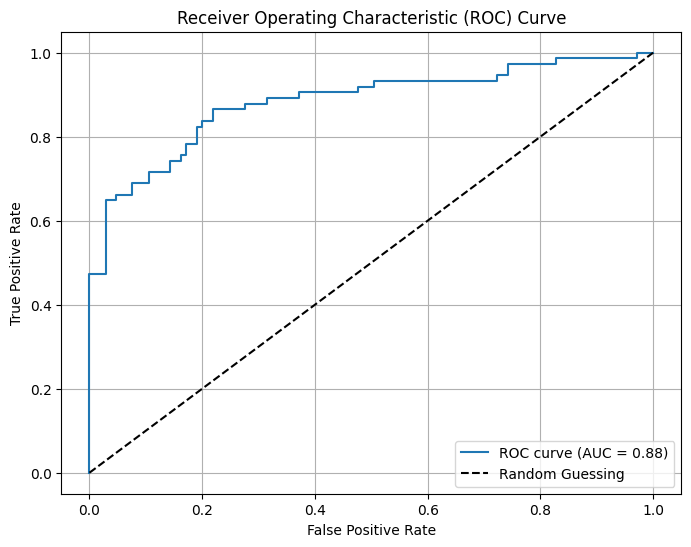

In [83]:
# Assuming 'model', 'X_test', and 'y_test' are already defined from the previous code

# Get predicted probabilities for the positive class
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc_score(y_test, y_pred_prob):.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')  # Add a line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

5. Interpretation:

In [84]:
import numpy as np

# Assuming 'model' is your trained logistic regression model and 'preprocessor' is your ColumnTransformer
#  and you have X_train and X_test available

# Get feature names after preprocessing (one-hot encoding creates new features)
feature_names = list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features))
numerical_feature_names = list(numerical_features)
feature_names = numerical_feature_names + feature_names

In [85]:
# Get the coefficients
coefficients = model.coef_[0]

# Create a DataFrame to display coefficients and their corresponding feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort by coefficient magnitude
coefficients_df = coefficients_df.reindex(coefficients_df['Coefficient'].abs().sort_values(ascending=False).index)


coefficients_df


,Feature,Coefficient
6,Sex_1,-1.327178
5,Sex_0,1.323626
0,Pclass,-0.783870
1,Age,-0.405249
2,SibSp,-0.348511
9,Embarked_2,-0.302391
10,Embarked_3,0.175210
7,Embarked_0,0.131069
4,Fare,0.124749
3,Parch,-0.094484


In [86]:
# Display the coefficients
print("\nFeature Coefficients:")
print(coefficients_df)

# Interpretation of Coefficients:
print("\nInterpretation of Coefficients:")
for index, row in coefficients_df.iterrows():
    feature = row['Feature']
    coefficient = row['Coefficient']
    if coefficient > 0:
        print(f"- {feature}:  A positive coefficient indicates that an increase in this feature is associated with an increased probability of survival.")
    else:
        print(f"- {feature}:  A negative coefficient indicates that an increase in this feature is associated with a decreased probability of survival.")


Feature Coefficients:
       Feature  Coefficient
6        Sex_1    -1.327178
5        Sex_0     1.323626
0       Pclass    -0.783870
1          Age    -0.405249
2        SibSp    -0.348511
9   Embarked_2    -0.302391
10  Embarked_3     0.175210
7   Embarked_0     0.131069
4         Fare     0.124749
3        Parch    -0.094484
8   Embarked_1    -0.007440

Interpretation of Coefficients:
- Sex_1:  A negative coefficient indicates that an increase in this feature is associated with a decreased probability of survival.
- Sex_0:  A positive coefficient indicates that an increase in this feature is associated with an increased probability of survival.
- Pclass:  A negative coefficient indicates that an increase in this feature is associated with a decreased probability of survival.
- Age:  A negative coefficient indicates that an increase in this feature is associated with a decreased probability of survival.
- SibSp:  A negative coefficient indicates that an increase in this feature is a

6. Deployment with Streamlit:

In [98]:
# Streamlit app
st.title("Titanic Survival Prediction")

# User inputs
pclass = st.selectbox("Pclass", data['Pclass'].unique())
sex = st.selectbox("Sex", data['Sex'].unique())
age = st.number_input("Age", min_value=0, max_value=100, value=25)
sibsp = st.number_input("SibSp", min_value=0, max_value=10, value=0)
parch = st.number_input("Parch", min_value=0, max_value=10, value=0)
fare = st.number_input("Fare", min_value=0.0, value=10.0)
embarked = st.selectbox("Embarked", data['Embarked'].unique())

2024-12-12 17:26:44.974 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-12 17:26:44.980 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-12 17:26:44.985 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-12 17:26:44.987 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-12 17:26:44.990 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-12 17:26:44.993 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-12 17:26:44.995 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-12 17:26:44.996 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [99]:
# Create input DataFrame
input_data = pd.DataFrame({
    'Pclass': [pclass],
    'Sex': [sex],
    'Age': [age],
    'SibSp': [sibsp],
    'Parch': [parch],
    'Fare': [fare],
    'Embarked': [embarked]
})


# Preprocess the user input
input_processed = preprocessor.transform(input_data)

# Make prediction
prediction = model.predict(input_processed)[0]
probability = model.predict_proba(input_processed)[0,1]

# Display prediction
st.subheader("Prediction:")
if prediction == 1:
    st.write("Survived (Probability: {:.2f}%)".format(probability*100))
else:
    st.write("Did not Survive (Probability: {:.2f}%)".format((1-probability)*100))

2024-12-12 17:26:50.047 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-12 17:26:50.050 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-12 17:26:50.052 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-12 17:26:50.055 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-12 17:26:50.057 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-12 17:26:50.059 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


Interview Questions:

1. What is the difference between precision and recall?




Precision measures the accuracy of positive predictions, while recall measures the completeness of positive predictions.


Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positives. In other words, it measures the accuracy of the positive predictions. It is calculated as:


Precision=True Positives/True Positives+False Positives


Recall: Recall, also known as sensitivity or true positive rate, is the ratio of correctly predicted positive observations to all actual positives. It measures the model's ability to find all the relevant cases within the data. It is calculated as:


Recall=True Positives/True Positives+False Negatives


2. What is cross-validation, and why is it important in binary classification?


Cross-validation is a technique used to assess the performance of machine learning models by splitting the dataset into
multiple subsets (folds) and training the model on different combinations of these subsets.
It helps to evaluate the model's performance in a more robust way compared to a single train-test split.


cross-validation is an essential technique in binary classification for obtaining reliable performance estimates,
reducing overfitting, and optimizing model hyperparameters.
